In [1]:
%matplotlib inline

# Autoencoder

Autoencoder, autoencoder sparse y autoencoder profundo

## Autoencoder básico

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [15]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [16]:
type(autoencoder)

keras.engine.training.Model

In [17]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [18]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [20]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [21]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.3540 - val_loss: 0.2711
Epoch 2/50
24576/60000 [===========>..................] - ETA: 1s - loss: 0.2689

KeyboardInterrupt: 

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

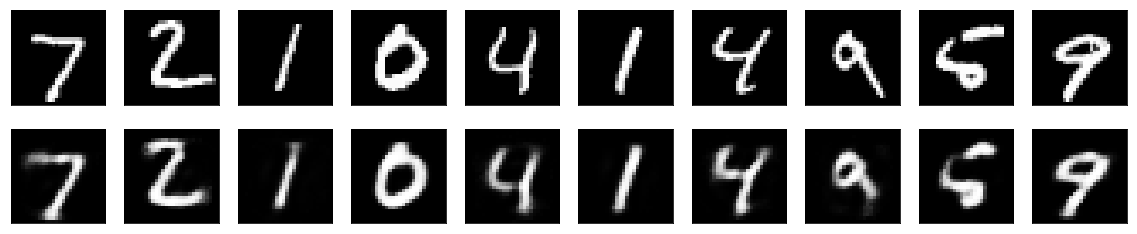

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Autoencoder sparse

In [12]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [13]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [14]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.6733 - val_loss: 0.6484
Epoch 2/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.4531 - val_loss: 0.4

KeyboardInterrupt: 

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

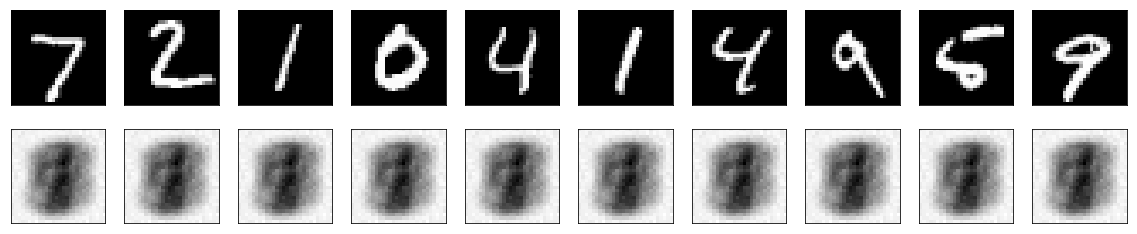

In [16]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Autoencoder profundo

In [65]:
# Define una arquitectura profunda para el autoencoder
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
#encoded = Dense(encoding_dim, activation='relu')(encoded)
#encoded = Dense(encoding_dim, activation='relu')(encoded)
#encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

In [66]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.3497 - val_loss: 0.2699
Epoch 2/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2617 - val_loss: 0.2502
Epoch 3/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2400 - val_loss: 0.2277
Epoch 4/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2199 - val_loss: 0.2103
Epoch 5/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2055 - val_loss: 0.1982
Epoch 6/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1949 - val_loss: 0.1889
Epoch 7/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1866 - val_loss: 0.1816
Epoch 8/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1798 - val_loss: 0.1752
Epoch 9/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1739 - val_loss: 0.1

60000/60000 [==============================] - 3s 51us/step - loss: 0.1010 - val_loss: 0.0993
Epoch 78/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1009 - val_loss: 0.0992
Epoch 79/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1008 - val_loss: 0.0991
Epoch 80/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1007 - val_loss: 0.0990
Epoch 81/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1006 - val_loss: 0.0989
Epoch 82/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1005 - val_loss: 0.0988
Epoch 83/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1004 - val_loss: 0.0987
Epoch 84/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1003 - val_loss: 0.0986
Epoch 85/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1002 - val_loss: 0.0985
Epoch 86/100
60000/60000 [========================

In [67]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [68]:
# encode and decode some digits
# note that we take them from the *test* set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

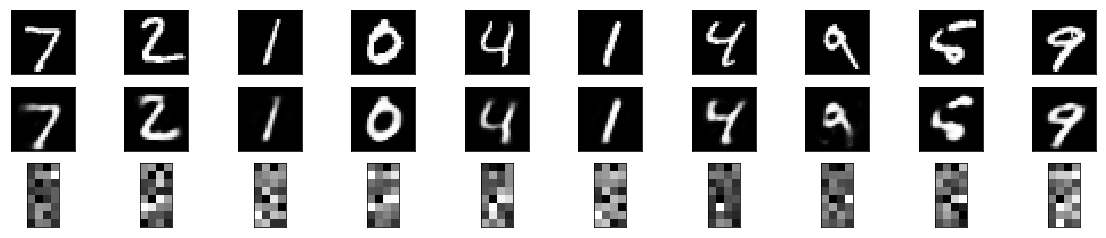

In [70]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1+n + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()